In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

## Reading Data

In [183]:
df = pd.read_csv("wdbc.dataset", header=None)

In [184]:
df.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Since the min and max of different feature have vastly different ranges we perform normalization

In [185]:
df[1] = df[1].apply(lambda x: 1 if x=="M" else 0)
y = df[1]
x = df.drop(columns=[1,0])

 X and Y is extracted from the dataset and in Y the values of M & B are changed to 1 and 0 respectively

### Splitting data into train and test and performing logistic regression using Scikit Learn implementation 

In [186]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [187]:
scaler = MinMaxScaler()
x_train_lr = scaler.fit_transform(x_train)
x_test_lr = scaler.transform(x_test)

In [188]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l2",max_iter=10000)
lr.fit(x_train_lr, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Following is the Accuracy of the Sklearn's implementation of Logistic Regression Model

In [189]:
print(lr.score(x_test_lr, y_test))

0.9473684210526315


# Logistic Regression from Scratch

In [190]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)
y_train,y_test, y_val = np.array(y_train).reshape(-1,1),np.array(y_test).reshape(-1,1),np.array(y_val).reshape(-1,1)

### Normalizing data using Min Max Scaler

In [191]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [192]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((364, 30), (364, 1), (114, 30), (114, 1), (91, 30), (91, 1))

In [193]:
x_train = x_train.T
y_train = y_train.T
x_val = x_val.T
y_val = y_val.T
x_test = x_test.T
y_test = y_test.T

In [194]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [195]:
def lr_fit(epochs, learningrate):
    print(" \n",epochs, learningrate)
    m = x_train.shape[1]
    m_val = x_val.shape[1]
    w = np.random.randn(x_train.shape[0], 1)*0.1
    b = 0
    
    for epoch in range(epochs):
        z = np.dot(w.T, x_train) + b
        p = sigmoid(z)
        train_cost = -np.sum(np.multiply(np.log(p), y_train) + np.multiply((1 - y_train), np.log(1 - p)))/m
        train_loss.append(np.squeeze(train_cost))
        train_accuracy.append(accuracy(p.copy(), y_train))

        dz = p-y_train
        dw = (1 / m) * np.dot(x_train, dz.T)
        db = (1 / m) * np.sum(dz)
        w = w - learningrate * dw 
        b = b - learningrate * db

        z_val = np.dot(w.T, x_val) + b
        p_val = sigmoid(z_val)
        val_cost = -np.sum(np.multiply(np.log(p_val), y_val) + np.multiply((1 - y_val), np.log(1 - p_val)))/m_val
        val_loss.append(val_cost)
        val_accuracy.append(accuracy(p_val.copy(), y_val))
        

    plt.plot(train_loss, label='training_loss')
    plt.plot(val_loss, label='validation_loss')
    plt.legend()
    plt.show()
    print(" Training loss  ",train_loss[-1],"\n Validation loss  ",val_loss[-1])
    print("\n Validation accuracy ",val_accuracy[-1], "\n Training accuracy ", train_accuracy[-1])
    print("============== End of Training ===========")


### Functions to compute accuracy , precision and recall 

In [196]:
def accuracy(preds, targets):
    preds = preds.reshape(-1,1)
    targets = targets.reshape(-1,1)
    for i in range(len(preds)):
        if preds[i] >= 0.5:
            preds[i] = 1
        else:
            preds[i] = 0
#     print(preds)
#     print(confusion_matrix(preds, targets))
    tn, fp, fn, tp = confusion_matrix(targets, preds).ravel()
    return (tn+tp)/(tn+tp+fn+fp)

def precision(preds, targets):
    preds = preds.reshape(-1,1)
    targets = targets.reshape(-1,1)
    for i in range(len(preds)):
        if preds[i] >= 0.5:
            preds[i] = 1
        else:
            preds[i] = 0
    tn, fp, fn, tp = confusion_matrix(targets, preds).ravel()
    return tp/(tp+fp)

def recall(preds, targets):
    preds = preds.reshape(-1,1)
    targets = targets.reshape(-1,1)
    for i in range(len(preds)):
        if preds[i] >= 0.5:
            preds[i] = 1
        else:
            preds[i] = 0
    tn, fp, fn, tp = confusion_matrix(targets, preds).ravel()
    return tp/(tp+fn)

### Resulting of training for the first time with epochs = 100 and Learning Rate = 0.5

 
 1000 0.5


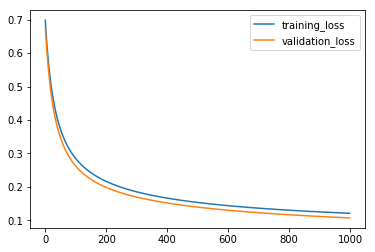

 Training loss   0.12066038258312009 
 Validation loss   0.1068003686925178

 Validation accuracy  0.978021978021978 
 Training accuracy  0.9697802197802198
============== End of Training ===========


In [197]:
train_loss = []
val_loss = []
val_accuracy = []
train_accuracy = []
lr_fit(1000, 0.5)

### Hyperparameter tuning by monitoring the validation loss

 
 4000 0.25


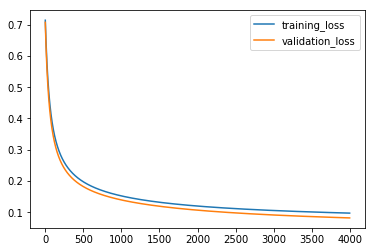

 Training loss   0.09792162601335652 
 Validation loss   0.08262212100106198

 Validation accuracy  0.978021978021978 
 Training accuracy  0.978021978021978
============== End of Training ===========
 
 8000 0.25


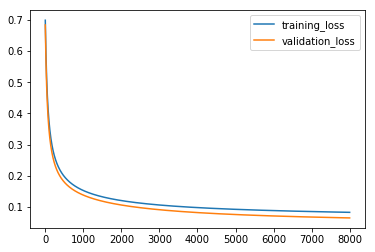

 Training loss   0.08290681955515711 
 Validation loss   0.06499979773252283

 Validation accuracy  0.989010989010989 
 Training accuracy  0.978021978021978
============== End of Training ===========
 
 14000 0.25


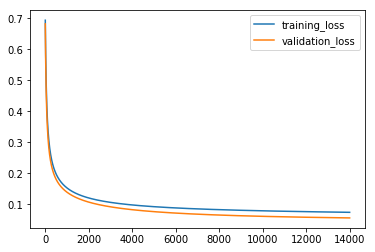

 Training loss   0.07432668229506091 
 Validation loss   0.05626663330105721

 Validation accuracy  0.989010989010989 
 Training accuracy  0.9807692307692307
============== End of Training ===========
 
 4000 0.12


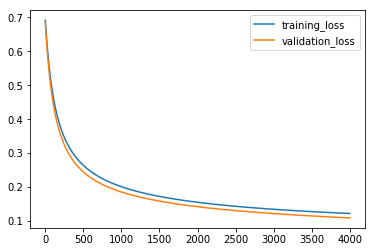

 Training loss   0.12217318682385109 
 Validation loss   0.10910144909171099

 Validation accuracy  0.967032967032967 
 Training accuracy  0.9697802197802198
============== End of Training ===========
 
 8000 0.12


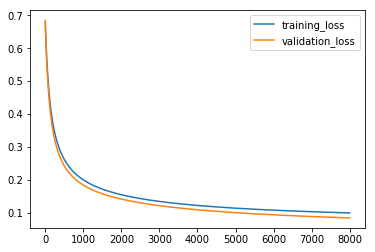

 Training loss   0.09884460519592536 
 Validation loss   0.08373864563456188

 Validation accuracy  0.978021978021978 
 Training accuracy  0.978021978021978
============== End of Training ===========
 
 14000 0.12


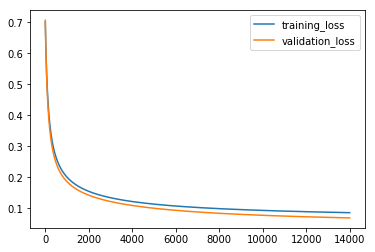

 Training loss   0.08598566570114599 
 Validation loss   0.06909116759424469

 Validation accuracy  0.989010989010989 
 Training accuracy  0.9807692307692307
============== End of Training ===========
 
 4000 0.06


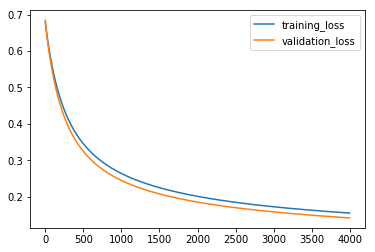

 Training loss   0.15525654579131618 
 Validation loss   0.14191022174637058

 Validation accuracy  0.967032967032967 
 Training accuracy  0.9697802197802198
============== End of Training ===========
 
 8000 0.06


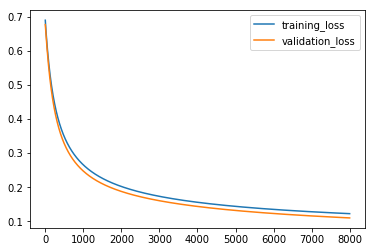

 Training loss   0.1224577767149527 
 Validation loss   0.10996286480821738

 Validation accuracy  0.967032967032967 
 Training accuracy  0.9697802197802198
============== End of Training ===========
 
 14000 0.06


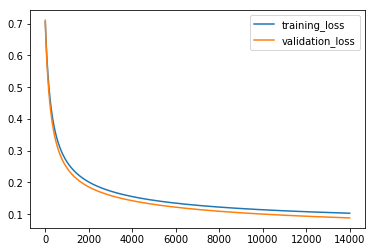

 Training loss   0.10300189628683215 
 Validation loss   0.0882374253236652

 Validation accuracy  0.978021978021978 
 Training accuracy  0.978021978021978
============== End of Training ===========


In [153]:
epochs = [4000,8000,14000]
learningrates = [0.25, 0.12, 0.06]
for learningrate in learningrates:
    for epoch in epochs:
        train_loss = []
        val_loss = []
        val_accuracy = []
        train_accuracy = []
        lr_fit(epoch, learningrate)

The epoch value of 14000 and learning rate value of 0.25 gives the lowest validation loss and highest accuracy

## Final training using the best hyperparameters found during tuning. 

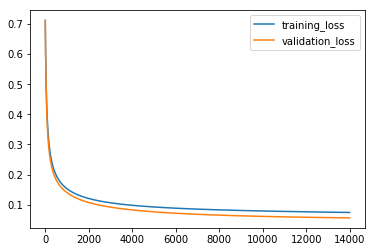

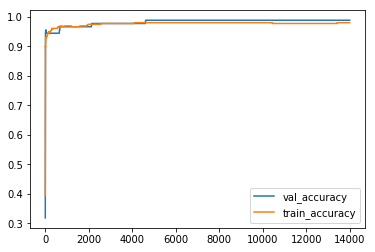

 Training loss   0.07425974968984544 
 Validation loss   0.056123003916175425

 Validation accuracy  0.989010989010989 
 Training accuracy  0.9807692307692307
============== End of Training ===========


In [198]:
epochs = 14000
learningrate = 0.25
train_loss = []
val_loss = []
val_accuracy = []
train_accuracy = []



m = x_train.shape[1]
m_val = x_val.shape[1]
w = np.random.randn(x_train.shape[0], 1)*0.1
b = 0

for epoch in range(epochs):
    z = np.dot(w.T, x_train) + b
    p = sigmoid(z)
    train_cost = -np.sum(np.multiply(np.log(p), y_train) + np.multiply((1 - y_train), np.log(1 - p)))/m
    train_loss.append(np.squeeze(train_cost))
    train_accuracy.append(accuracy(p.copy(), y_train))

    dz = p-y_train
    dw = (1 / m) * np.dot(x_train, dz.T)
    db = (1 / m) * np.sum(dz)
    w = w - learningrate * dw 
    b = b - learningrate * db

    z_val = np.dot(w.T, x_val) + b
    p_val = sigmoid(z_val)
    val_cost = -np.sum(np.multiply(np.log(p_val), y_val) + np.multiply((1 - y_val), np.log(1 - p_val)))/m_val
    val_loss.append(val_cost)
    val_accuracy.append(accuracy(p_val.copy(), y_val))


plt.plot(train_loss, label='training_loss')
plt.plot(val_loss, label='validation_loss')
plt.legend()
plt.show()

plt.plot(val_accuracy, label='val_accuracy')
plt.plot(train_accuracy, label='train_accuracy')
plt.legend()
plt.show()

print(" Training loss  ",train_loss[-1],"\n Validation loss  ",val_loss[-1])
print("\n Validation accuracy ",val_accuracy[-1], "\n Training accuracy ", train_accuracy[-1])
print("============== End of Training ===========")


## Testing the model on unseen Testing Data

In [201]:
def predict(x, y):
    z = np.dot(w.T, x) + b
    p = sigmoid(z)
    print("Accuracy: ",accuracy(p.copy(), y))
    print("Recall: ",recall(p.copy(), y))
    print("Precision: ",precision(p.copy(), y))

In [202]:
predict(x_test, y_test)

Accuracy:  0.9736842105263158
Recall:  0.925
Precision:  1.0
